![example](Data/header.jpg)

# Microsoft Movie Recommendation System

**Author:** 
Neville Ngenzi
***

## Business Understanding

### Introduction
***
It is Microsoft's time to Dive deep into the world of film, decipher the trends, and emerge with the knowledge that will propel Microsoft's movie studio to stardom on their launch. The stage is set, the cameras are rolling, and the future of Microsoft's cinematic journey rests upon this insightful analysis.


### Overview
***
This project aims to build a robust movie recommendation system by leveraging a diverse dataset encompassing user behaviour and movie characteristics. By analyzing these data points together, we identify patterns and relationships between movies and user preferences, resulting in a recommendation system capable of accurately predicting user engagement with specific movies. Further analysis is recommended to refine the system and explore the inclusion of additional data sources, such as social media interactions and user demographics, to enhance its accuracy and personalization further.


### Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

***

### Objectives

#### Main Objectives.

#### Specific Objectives


***

## Data Understanding

This research uses data from several sources, such as box office data, movie attributes, and critical response data, to detect trends and determine what influences the performance of films. A sample of movie releases with both quantitative and categorical factors is represented by the data. To properly comprehend the data and prepare it for efficient analysis, more analysis was required.
***

### Introduction 

In order to analyze and visualize data, we will import a some ctandard Python packages for analysis.

In [47]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

Load the CSV files from the data directory into a pandas DataFrame 

In [48]:
# Load the data file
bomMovie_df = pd.read_csv("data/bom.movie_gross.csv")
# Display the DataFrame
bomMovie_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [49]:
# Get the list of all tables in the sql_query
with sqlite3.connect('data/im.db') as conn:
    cur = conn.cursor()
    cur.execute("""
                SELECT name 
                FROM sqlite_master 
                WHERE type='table';
                """)
    tables = cur.fetchall()
    for table in tables:
        print(table)

('movie_basics',)
('directors',)
('known_for',)
('movie_akas',)
('movie_ratings',)
('persons',)
('principals',)
('writers',)
('im.db',)


In [50]:
movie_info_df = pd.read_csv('Data/rt.movie_info.tsv', sep='\t')
movie_info_df


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [51]:
reviews_df = pd.read_csv('Data/rt.reviews.tsv', sep='\t', encoding='latin1')
reviews_df


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [52]:
movie_budgets_df = pd.read_csv('Data/tmdb.movies.csv')
movie_budgets_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [53]:
movie_budgets_df = pd.read_csv('Data/tn.movie_budgets.csv')
movie_budgets_df


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


Load the movie_basics, movie_akas, and movie_ratings tables into a pandas DataFrame, and combine the DataFrames using the main key 'movie_id,' which will then read data from an SQLite database called im.db in the data directory.

In [54]:
conn = sqlite3.connect('data/im.db')
# Read each table into a DataFrame
movie_basics_df = pd.read_sql_query("SELECT * FROM movie_basics;", conn)
movie_akas_df = pd.read_sql_query("SELECT * FROM movie_akas;", conn)
movie_ratings_df = pd.read_sql_query("SELECT * FROM movie_ratings;", conn)
conn.close()
# Merge the tables using the primary key 'movie_id'
merged_df = pd.merge(movie_basics_df, movie_akas_df, how='inner', on='movie_id')
merged_df = pd.merge(merged_df, movie_ratings_df, how='inner', on='movie_id')
merged_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,Sangharsh,IN,hi,None,alternative transliteration,0.0,7.0,77
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",2,Sunghursh,None,None,original,None,1.0,7.0,77
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",3,Sunghursh,IN,None,None,None,0.0,7.0,77
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",4,Sunghursh,IN,hi,None,alternative transliteration,0.0,7.0,77
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",5,Sungharsh,IN,hi,None,alternative spelling,0.0,7.0,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261801,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,2,Sisterleaf,IN,en,None,literal English title,0.0,8.4,600
261802,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,3,Pengalila,IN,None,None,None,0.0,8.4,600
261803,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,1,Padmavyuhathile Abhimanyu,None,None,original,None,1.0,8.4,365
261804,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,2,Pathmavyuhathile Abhimanyu,IN,ml,None,alternative spelling,0.0,8.4,365


Merge the DataFrame 'merged_df' (created from the SQLite database im.db) with the DataFrame 'bomMovie_df'.

In [55]:
# Merge the im.db and bomMovie_df using the 'title' column as the primary key
movies_df = pd.merge(merged_df, bomMovie_df, how='inner', on='title')
movies_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",1,Wazir,None,None,original,None,1.0,7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",3,Wazir,IN,None,None,None,0.0,7.1,15378,Relbig.,1100000.0,NaN,2016
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",15,On the Road,None,None,original,None,1.0,6.1,37886,IFC,744000.0,8000000,2012
3,tt4339118,On the Road,On the Road,2014,89.0,Drama,2,On the Road,None,None,original,None,1.0,6.0,6,IFC,744000.0,8000000,2012
4,tt5647250,On the Road,On the Road,2016,121.0,Drama,2,On the Road,GB,None,None,None,0.0,5.7,127,IFC,744000.0,8000000,2012


In [56]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10624 entries, 0 to 10623
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           10624 non-null  object 
 1   primary_title      10624 non-null  object 
 2   original_title     10624 non-null  object 
 3   start_year         10624 non-null  int64  
 4   runtime_minutes    10567 non-null  float64
 5   genres             10616 non-null  object 
 6   ordering           10624 non-null  int64  
 7   title              10624 non-null  object 
 8   region             8314 non-null   object 
 9   language           1759 non-null   object 
 10  types              8152 non-null   object 
 11  attributes         349 non-null    object 
 12  is_original_title  10624 non-null  float64
 13  averagerating      10624 non-null  float64
 14  numvotes           10624 non-null  int64  
 15  studio             10616 non-null  object 
 16  domestic_gross     105

## Data Preparation

***

The data that was converted and stored to  'movies_df' will be explored and analyzed. The data will make obtaining descriptive statistics and checking for duplicates easier. Data cleaning is performed to handle missing values and outliers, and to address any inconsistencies or errors. From the large dataset we will select some specific columns from the DataFrame 'movies_df' for easier descriptive analyis and determine the number of records, preview top and bottom of the merged dataset and each column's data type.

We are going to CLEAN the data by generating new variables, and employ methods for handling missing values or outliers while maintaining business decisions.

In [57]:
# Relevant columns
movies_df = movies_df[['movie_id', 'title', 'genres', 'averagerating', 'domestic_gross', 'foreign_gross', 'numvotes', 'year', 'studio']]
movies_df

,movie_id,title,genres,averagerating,domestic_gross,foreign_gross,numvotes,year,studio
0,tt0315642,Wazir,"Action,Crime,Drama",7.1,1100000.0,NaN,15378,2016,Relbig.
1,tt0315642,Wazir,"Action,Crime,Drama",7.1,1100000.0,NaN,15378,2016,Relbig.
2,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,744000.0,8000000,37886,2012,IFC
3,tt4339118,On the Road,Drama,6.0,744000.0,8000000,6,2012,IFC
4,tt5647250,On the Road,Drama,5.7,744000.0,8000000,127,2012,IFC
...,...,...,...,...,...,...,...,...,...
10619,tt8549902,Oolong Courtyard,Comedy,4.6,37700.0,NaN,61,2018,CL
10620,tt9078374,Last Letter,"Drama,Romance",6.4,181000.0,NaN,322,2018,CL
10621,tt9151704,Burn the Stage: The Movie,"Documentary,Music",8.8,4200000.0,16100000,2067,2018,Trafalgar
10622,tt9151704,Burn the Stage: The Movie,"Documentary,Music",8.8,4200000.0,16100000,2067,2018,Trafalgar


Removing duplicate rows from the DataFrame 'movies_df'. 

In [58]:
# Remove duplicates on all columns
movies_df_nodup = movies_df.drop_duplicates()

# Remove duplicates on specific columns
movies_df_nodup = movies_df.drop_duplicates(subset=['movie_id', 'title'])
movies_df_nodup

,movie_id,title,genres,averagerating,domestic_gross,foreign_gross,numvotes,year,studio
0,tt0315642,Wazir,"Action,Crime,Drama",7.1,1100000.0,NaN,15378,2016,Relbig.
2,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,744000.0,8000000,37886,2012,IFC
3,tt4339118,On the Road,Drama,6.0,744000.0,8000000,6,2012,IFC
4,tt5647250,On the Road,Drama,5.7,744000.0,8000000,127,2012,IFC
6,tt0339736,Whiplash,Horror,5.6,13100000.0,35900000,2420,2014,SPC
...,...,...,...,...,...,...,...,...,...
10615,tt8404272,How Long Will I Love U,Romance,6.5,747000.0,82100000,607,2018,WGUSA
10616,tt8427036,Helicopter Eela,Drama,5.4,72000.0,NaN,673,2018,Eros
10618,tt8549902,Oolong Courtyard,Comedy,4.6,37700.0,NaN,61,2018,CL
10620,tt9078374,Last Letter,"Drama,Romance",6.4,181000.0,NaN,322,2018,CL


Handling missing values

In [59]:
# Calculate the count of missing values for each column in the 'movies_df' DataFrame
missing_values_per_column = movies_df.isnull().sum()
print('\nMissing values per column:')
print(missing_values_per_column)


Missing values per column:
movie_id             0
title                0
genres               8
averagerating        0
domestic_gross      63
foreign_gross     3431
numvotes             0
year                 0
studio               8
dtype: int64


Creating new features for the dataset.

In [60]:
# 'missing_values_per_column' is the count of missing values for each column
missing_values_per_column = movies_df_nodup.isnull().sum()

# Create an explicit copy of the DataFrame
movies_df_nodup_copy = movies_df_nodup.copy()

# 'foreign_gross' and 'domestic_gross' are converted to numeric and NaN values are filled with mean
movies_df_nodup_copy['foreign_gross'] = pd.to_numeric(movies_df_nodup_copy['foreign_gross'], errors='coerce')
movies_df_nodup_copy['domestic_gross'] = pd.to_numeric(movies_df_nodup_copy['domestic_gross'], errors='coerce')
movies_df_nodup_copy['domestic_gross'].fillna(movies_df_nodup_copy['domestic_gross'].mean(), inplace=True)
movies_df_nodup_copy['foreign_gross'].fillna(movies_df_nodup_copy['foreign_gross'].mean(), inplace=True)

# Display missing values after the changes
missing_values_per_column = movies_df_nodup_copy.isnull().sum()
print(missing_values_per_column)

movie_id          0
title             0
genres            7
averagerating     0
domestic_gross    0
foreign_gross     0
numvotes          0
year              0
studio            3
dtype: int64


In [61]:
# 'total_gross' is a new column for total gross, calculated as the sum of 'domestic_gross' and 'foreign_gross'
movies_df_nodup_copy['total_gross'] = movies_df_nodup_copy['domestic_gross'] + movies_df_nodup_copy['foreign_gross']
movies_df_nodup_copy['total_gross'] = movies_df_nodup_copy['total_gross'].astype('int')



movies_df_nodup_copy

,movie_id,title,genres,averagerating,domestic_gross,foreign_gross,numvotes,year,studio,total_gross
0,tt0315642,Wazir,"Action,Crime,Drama",7.1,1100000.0,7.796155e+07,15378,2016,Relbig.,79061546
2,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,744000.0,8.000000e+06,37886,2012,IFC,8744000
3,tt4339118,On the Road,Drama,6.0,744000.0,8.000000e+06,6,2012,IFC,8744000
4,tt5647250,On the Road,Drama,5.7,744000.0,8.000000e+06,127,2012,IFC,8744000
6,tt0339736,Whiplash,Horror,5.6,13100000.0,3.590000e+07,2420,2014,SPC,49000000
...,...,...,...,...,...,...,...,...,...,...
10615,tt8404272,How Long Will I Love U,Romance,6.5,747000.0,8.210000e+07,607,2018,WGUSA,82847000
10616,tt8427036,Helicopter Eela,Drama,5.4,72000.0,7.796155e+07,673,2018,Eros,78033546
10618,tt8549902,Oolong Courtyard,Comedy,4.6,37700.0,7.796155e+07,61,2018,CL,77999246
10620,tt9078374,Last Letter,"Drama,Romance",6.4,181000.0,7.796155e+07,322,2018,CL,78142546


Aggregating the data

In [62]:
# 'average_ratings_df' is the resulting DataFrame with average rating, total gross, and other columns
average_ratings_df = movies_df_nodup_copy.groupby('title').agg({
    'averagerating': 'mean',
    'total_gross': 'sum',  # Ensure that 'total_gross' is present in the DataFrame
    'movie_id': 'first',
    'genres': 'first'
}).reset_index()

# Display the resulting DataFrame
average_ratings_df


,title,averagerating,total_gross,movie_id,genres
0,'71,7.2,1655000,tt2614684,"Action,Drama,Thriller"
1,"1,000 Times Good Night",7.1,78015446,tt2353767,"Drama,War"
2,10 Cloverfield Lane,7.2,110200000,tt1179933,"Drama,Horror,Mystery"
3,10 Years,6.3,156329092,tt1715873,"Comedy,Drama,Romance"
4,1001 Grams,6.3,77972546,tt3346824,Drama
...,...,...,...,...,...
2730,Zombeavers,4.8,77976446,tt2784512,"Action,Adventure,Comedy"
2731,Zookeeper,5.2,169900000,tt1222817,"Comedy,Family,Romance"
2732,Zoolander 2,4.7,56700000,tt1608290,Comedy
2733,Zootopia,8.0,1023800000,tt2948356,"Adventure,Animation,Comedy"


Detecting and handling outliers

In [63]:
# Calculate Q1, Q3, and IQR
Q1 = average_ratings_df['total_gross'].quantile(0.25)
Q3 = average_ratings_df['total_gross'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = average_ratings_df[(average_ratings_df['total_gross'] < lower_bound) | (average_ratings_df['total_gross'] > upper_bound)]
outliers

,title,averagerating,total_gross,movie_id,genres
28,22 Jump Street,7.000000,331300000,tt2294449,"Action,Comedy,Crime"
69,A Good Day to Die Hard,5.300000,304600000,tt1606378,"Action,Thriller"
93,A Quiet Place,7.100000,681800000,tt6347308,Documentary
117,Abduction,4.857143,574700000,tt1600195,"Action,Mystery,Thriller"
134,After Earth,4.800000,243800000,tt1815862,"Action,Adventure,Drama"
...,...,...,...,...,...
2703,X-Men: First Class,7.700000,353600000,tt1270798,"Action,Adventure,Sci-Fi"
2722,Your Name.,8.400000,358000000,tt5311514,"Animation,Drama,Fantasy"
2724,Youth,6.880000,403307730,tt2536448,"Drama,Family"
2733,Zootopia,8.000000,1023800000,tt2948356,"Adventure,Animation,Comedy"


## Data Modeling



We will interpret the results of the dataset and see if the model changed significantly and to what extent would the results be of accurate data. 
***

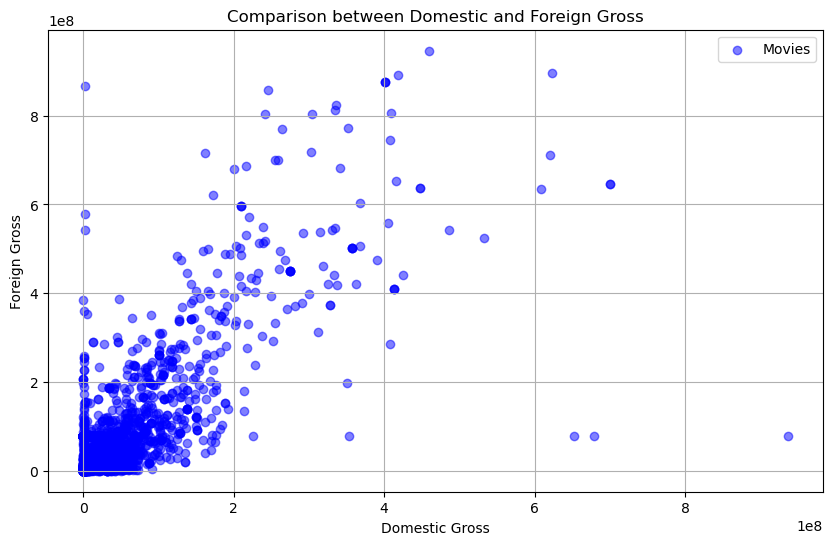

In [64]:
# Drop rows with NaN values in 'domestic_gross' or 'foreign_gross'
movies_df_cleaned = movies_df_nodup_copy.dropna(subset=['domestic_gross', 'foreign_gross'])

# Plotting the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for domestic vs foreign gross with different shapes
plt.scatter(movies_df_cleaned['domestic_gross'], movies_df_cleaned['foreign_gross'], color='blue', alpha=0.5, label='Movies', marker='o')
plt.xlabel('Domestic Gross')
plt.ylabel('Foreign Gross')
plt.title('Comparison between Domestic and Foreign Gross')
plt.grid(True)

# Add legend
plt.legend()

plt.show()


Market Preferences: The plot can give insights into whether certain genres or types of movies tend to perform better in domestic markets, foreign markets, or both. This information can be used to tailor recommendations based on user preferences in specific regions.

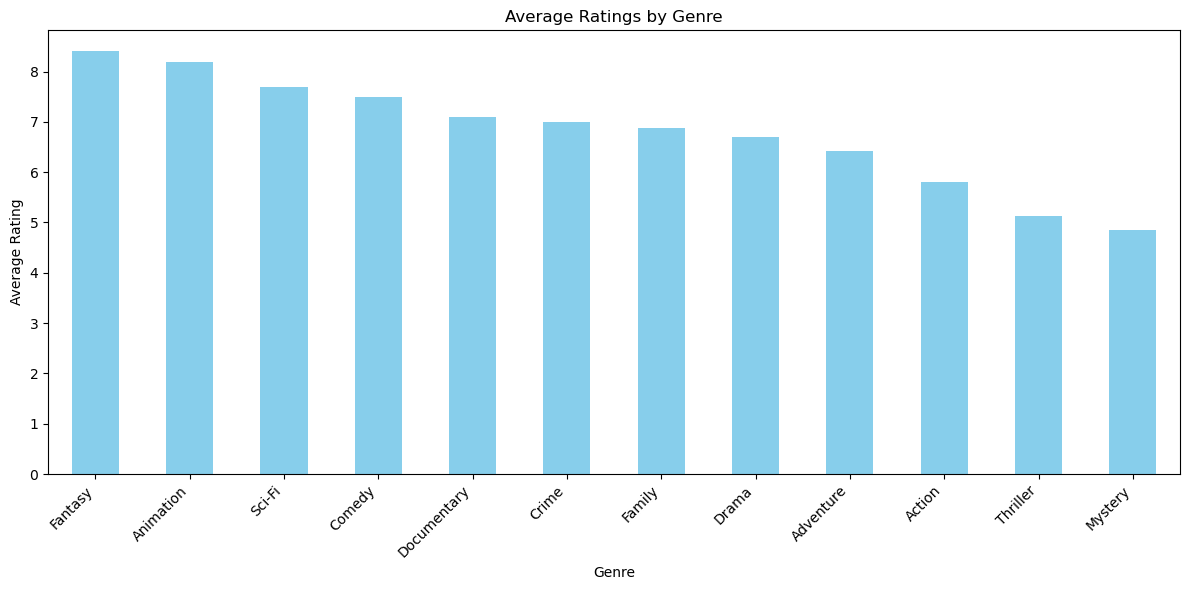

In [66]:
df = pd.DataFrame(data)

# Split the genres and create a row for each genre-movie pair
df_genres = df['genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')
df_expanded = df.join(df_genres)

# Calculate average rating for each genre
avg_rating_by_genre = df_expanded.groupby('genre')['averagerating'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
avg_rating_by_genre.plot(kind='bar', color='skyblue')
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


* Check for any seasonal patterns that might influence average foreign gross. This information can be valuable for scheduling movie releases or marketing campaigns during specific times of the year.
Content and Genre Analysis:


* Consider external factors such as changes in the global film industry, economic conditions, or geopolitical events that might have influenced foreign gross. Understanding market dynamics is crucial for strategic planning.
Investment Decisions:

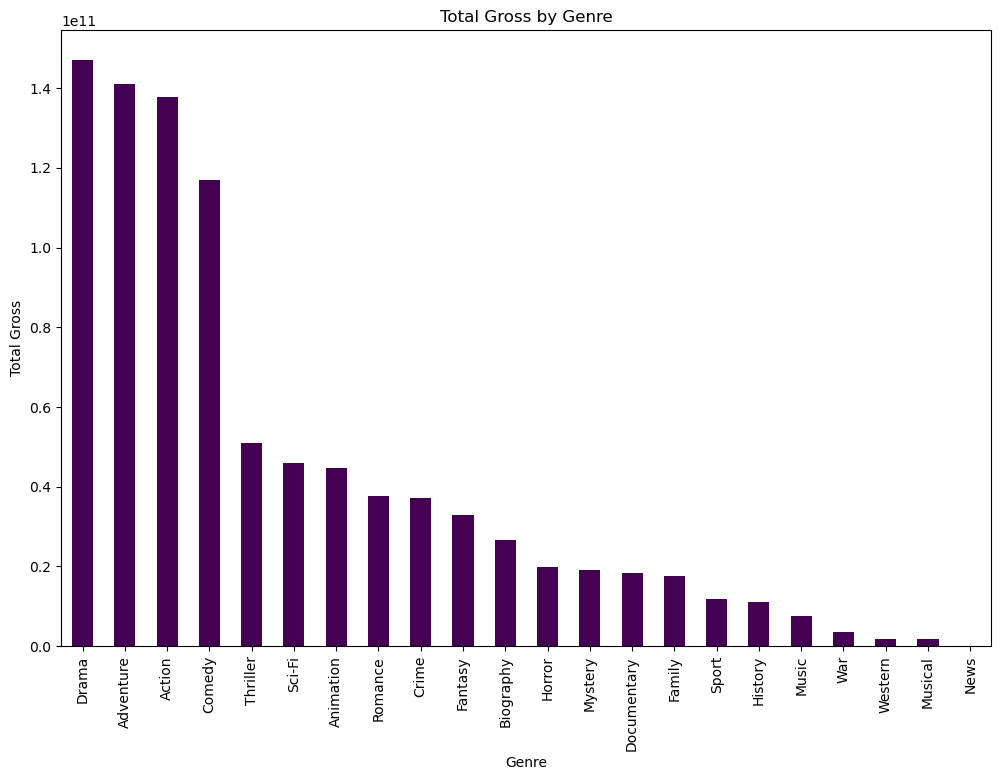

In [67]:
# Select relevant columns
genre_gross_data = average_ratings_df[['genres', 'total_gross']].copy()  # Use copy() to create a copy of the DataFrame

# Split the 'genres' column into a list of genres
genre_gross_data['genres'] = genre_gross_data['genres'].apply(lambda x: x.split(','))

# Create a new DataFrame with one row for each genre and its corresponding total gross
genre_df = pd.DataFrame([(genre, gross) for genres, gross in zip(genre_gross_data['genres'], genre_gross_data['total_gross']) for genre in genres],
                        columns=['genre', 'total_gross'])

# Group by genre and sum the total gross
genre_totals = genre_df.groupby('genre')['total_gross'].sum().sort_values(ascending=False)

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
genre_totals.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Genre')
plt.ylabel('Total Gross')
plt.title('Total Gross by Genre')
plt.show()


Analyzing the stacked bar chart showing the total gross by genre can provide several insights that could be valuable for a movie recommendation system. Here are some potential insights:

Top-Grossing Genres:

Identify the genres that contribute the most to total gross. These genres might be popular among the audience and could be prioritized in the movie recommendation system.
Diversification of Revenue:

Examine how revenue is distributed across different genres. A diverse set of genres contributing to high total gross could suggest that Microsoft's movie recommendation system should offer a broad range of genres to cater to various audience preferences.
Genre Combinations:

Explore which combinations of genres tend to perform well. For instance, the chart might reveal that movies with a combination of "Action" and "Adventure" have higher total gross.
Underperforming Genres:

Identify genres that contribute less to total gross. While not every movie needs to be a blockbuster, understanding the performance of different genres can help in making strategic decisions.
Seasonal Trends:

Analyze whether certain genres perform better in specific years or seasons. This could inform content planning based on temporal trends.
Recommendation Personalization:

Consider personalizing recommendations based on a user's historical preference for specific genres. If certain genres consistently contribute to higher total gross, the recommendation system can prioritize those genres for users who have shown a preference for them.
Market Trends:

Stay aware of changing market trends by monitoring shifts in genre popularity over time. This information can be valuable for adapting the recommendation system to evolving audience preferences.

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***